# Case V360
Um de nossos clientes est√° enfrentando dificuldades em seu processo de notas fiscais. O cliente relata que:

- As notas fiscais demoram muito tempo para serem processadas. Onde o tempo de finaliza√ß√£o do processo aceit√°vel, para este cliente, √© de 2 dias corridos.

- Muitas das notas apresentam diverg√™ncias durante o processamento (uma diverg√™ncia ocorre quando alguma informa√ß√£o da nota fiscal n√£o confere com o pedido). Por√©m, o cliente n√£o consegue entender qual √© a maior diverg√™ncia e o que est√° ocasionando tais paradas durante o processo.

- ‚Äú√â, simplesmente, imposs√≠vel visualizar quais tipos de notas est√£o entrando dentre as milhares de notas que s√£o capturadas diariamente‚Äù.

Para conseguir solucionar o problema do cliente, deve-se explorar a base de dados do V360 em busca das informa√ß√µes necess√°rias para a constru√ß√£o de um dashboard que ir√° auxiliar no acompanhamento da opera√ß√£o.


## Importando Base e Bibliotecas

In [30]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Importando a base
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
base_v360 = pd.read_csv('/content/drive/MyDrive/Case V360/consulta_v360.csv', sep=',')

Mounted at /content/drive


In [32]:
# Verificando a base
base_v360.head(30)

usuario_atribuido_id  nota_fiscal_id  processo_id        tipo_processo  \
0                      8             181          211   An√°lise Financeira   
1                      8             182          212   An√°lise Financeira   
2                      8             183          213   An√°lise Financeira   
3                      8             184          214   An√°lise Financeira   
4                      8             185          215   An√°lise Financeira   
5                      8             186          216   An√°lise Financeira   
6                      8             187          217   An√°lise Financeira   
7                      8             188          218   An√°lise Financeira   
8                      8             189          219   An√°lise Financeira   
9                      8             190          220   An√°lise Financeira   
10                     8             191          221   An√°lise Financeira   
11                     8             192          222   An√°lise Financeira   
12                     8             193          223   An√°lise Financeira   
13                     8             194          224   An√°lise Financeira   
14                     8             195          225   An√°lise Financeira   
15                     8             196          226   An√°lise Financeira   
16                     8             197          227  An√°lise Operacional   
17                     8             198          228  An√°lise Operacional   
18                     8             199          229  An√°lise Operacional   
19                     8             200          230  An√°lise Operacional   
20                     8             201          231   An√°lise Financeira   
21                     8             202          232   An√°lise Financeira   
22                     8             203          233   An√°lise Financeira   
23                     8             204          234   An√°lise Financeira   
24                     8             205          235   An√°lise Financeira   
25                     8             206          236   An√°lise Financeira   
26                     8             207          237   An√°lise Financeira   
27                     8             208          238   An√°lise Financeira   
28                     8             209          239   An√°lise Financeira   
29                     8             210          240   An√°lise Financeira   

    divergencia_id produto/servico    valor           nome_divergencia  \
0            133.0       Produto A   1000.0            Valor incorreto   
1            134.0       Produto B   1500.5            Valor incorreto   
2            135.0       Servi√ßo C   1300.0            Valor incorreto   
3            136.0       Produto D   1600.0            Valor incorreto   
4            137.0       Produto E   3500.5            Valor incorreto   
5            138.0       Servi√ßo F   3400.0            Valor incorreto   
6            139.0       Produto G   1070.0            Valor incorreto   
7            140.0       Produto H   5008.5            Valor incorreto   
8            141.0       Servi√ßo I   3060.0            Valor incorreto   
9            142.0       Produto J   6000.0            Valor incorreto   
10           143.0       Produto K    560.5            Valor incorreto   
11           144.0       Servi√ßo L    370.0            Valor incorreto   
12           145.0       Produto M   1500.0            Valor incorreto   
13           146.0       Produto N   5080.5            Valor incorreto   
14           147.0       Servi√ßo O   3009.0            Valor incorreto   
15           148.0       Produto P   1008.0            Valor incorreto   
16           149.0       Produto Q   5060.5            Valor incorreto   
17           150.0       Servi√ßo R   3020.0            Valor incorreto   
18           151.0       Produto S   3000.0            Valor incorreto   
19           152.0       Produto T   5200.5  Produto/Servi√ßo Incorre

## Dicion√°rio dos Dados

- usuario_atribuido_id: ID do usu√°rio respons√°vel.

- nota_fiscal_id: ID da nota fiscal.
- processo_id: ID do processo associado.
- tipo_processo: Tipo de processo realizado.
- divergencia_id: ID da diverg√™ncia encontrada.
- produto/servico: Produto ou servi√ßo relacionado √† nota fiscal.
- valor: Valor associado ao produto ou servi√ßo.
- nome_divergencia: Nome da diverg√™ncia identificada.
- tipo_divergencia: Categoria da diverg√™ncia.
- data_criacao: Data de cria√ß√£o do processo.
- data_finalizacao: Data de finaliza√ß√£o do processo.
- tempo_processamento: Tempo total de processamento (em dias).
- processamento_atrasado: Indica se o processamento ultrapassou o limite aceit√°vel de 2 dias.

In [33]:
# Informa√ß√µes sobre as colunas
base_v360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   usuario_atribuido_id    30 non-null     int64  
 1   nota_fiscal_id          30 non-null     int64  
 2   processo_id             30 non-null     int64  
 3   tipo_processo           30 non-null     object 
 4   divergencia_id          22 non-null     float64
 5   produto/servico         30 non-null     object 
 6   valor                   30 non-null     float64
 7   nome_divergencia        22 non-null     object 
 8   tipo_divergencia        22 non-null     object 
 9   data_criacao            30 non-null     object 
 10  data_finalizacao        30 non-null     object 
 11  tempo_processamento     30 non-null     float64
 12  processamento_atrasado  30 non-null     object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ KB


OBS: Percebe-se alguns valores nulos nas colunas 'nome_divergencia', 'tipo_divergencia', 'divergencia' e tamb√©m as colunas de data est√£o como objects e n√£o como datetime. Vamos analisar e corrigir na etapa de Tratamento









In [34]:
# Estat√≠sticas sobre as colunas
base_v360.describe()

usuario_atribuido_id  nota_fiscal_id  processo_id  divergencia_id  \
count                  30.0       30.000000    30.000000       22.000000   
mean                    8.0      195.500000   225.500000      143.500000   
std                     0.0        8.803408     8.803408        6.493587   
min                     8.0      181.000000   211.000000      133.000000   
25%                     8.0      188.250000   218.250000      138.250000   
50%                     8.0      195.500000   225.500000      143.500000   
75%                     8.0      202.750000   232.750000      148.750000   
max                     8.0      210.000000   240.000000      154.000000   

              valor  tempo_processamento  
count     30.000000            30.000000  
mean    3651.666667             4.240278  
std     2827.278917             3.081461  
min      370.000000             0.006944  
25%     1500.125000             0.506944  
50%     3025.000000             5.006944  
75%     5035.500000             7.006944  
max    11000.000000             9.006944

OBS: As outras colunas parecem normais

## Tratamento
Nesta etapa iremos fazer os tratamentos mapeados na etapa anterior

In [35]:
# Converter datas para formato datetime
base_v360['data_criacao'] = pd.to_datetime(base_v360['data_criacao'])
base_v360['data_finalizacao'] = pd.to_datetime(base_v360['data_finalizacao'])

In [36]:
# Analisar as linhas com valores nulos
linhas_nulas = base_v360[base_v360.isnull().any(axis=1)]

# Exibir as primeiras linhas com valores nulos
linhas_nulas.head(30)

usuario_atribuido_id  nota_fiscal_id  processo_id       tipo_processo  \
22                     8             203          233  An√°lise Financeira   
23                     8             204          234  An√°lise Financeira   
24                     8             205          235  An√°lise Financeira   
25                     8             206          236  An√°lise Financeira   
26                     8             207          237  An√°lise Financeira   
27                     8             208          238  An√°lise Financeira   
28                     8             209          239  An√°lise Financeira   
29                     8             210          240  An√°lise Financeira   

    divergencia_id produto/servico    valor nome_divergencia tipo_divergencia  \
22             NaN       Produto W   5040.5              NaN              NaN   
23             NaN       Servi√ßo X   3010.0              NaN              NaN   
24             NaN       Produto Y  11000.0              NaN              NaN   
25             NaN       Produto Z   5020.5              NaN              NaN   
26             NaN       Servi√ßo Z   3020.0              NaN              NaN   
27             NaN       Produto X  10500.0              NaN              NaN   
28             NaN       Produto Y    580.5              NaN              NaN   
29             NaN       Servi√ßo Y   3070.0              NaN              NaN   

          data_criacao    data_finalizacao  tempo_processamento  \
22 2025-01-10 11:00:00 2025-01-10 11:10:00             0.006944   
23 2025-01-10 11:05:00 2025-01-10 11:15:00             0.006944   
24 2025-01-10 11:10:00 2025-01-10 11:20:00             0.006944   
25 2025-01-10 11:15:00 2025-01-10 11:25:00             0.006944   
26 2025-01-10 11:20:00 2025-01-10 11:30:00             0.006944   
27 2025-01-10 11:25:00 2025-01-10 11:35:00             0.006944   
28 2025-01-10 11:30:00 2025-01-10 11:40:00             0.006944   
29 2025-01-10 11:35:00 2025-01-10 11:45:00             0.006944   

   processamento_atrasado  
22                    N√£o  
23                    N√£o  
24                    N√£o  
25                    N√£o  
26                    N√£o  
27                    N√£o  
28                    N√£o  
29                    N√£o

OBS: Percebe-se que as colunas nulos de 'nome_divergencia', 'tipo_divergencia', 'divergencia' est√£o associadas com a coluna de 'processamento_atrasado' == N√£o. Isso significa que, provavelmente, os processamentos s√£o atrasados devido √†s diverg√™ncias que ocorrem durante o processo. Por boas pr√°ticas, vamos manter os valores NaN no momento e corrigimos posteriormente para o modelo de machine learning.



In [37]:
# Substituir valores nulos por -1
base_v360.fillna('Sem diverg√™ncias', inplace=True)

# Verificar se a substitui√ß√£o foi feita corretamente
base_v360[base_v360.isnull().any(axis=1)]

<ipython-input-37-595cdcceca47>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem diverg√™ncias' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  base_v360.fillna('Sem diverg√™ncias', inplace=True)


Empty DataFrame
Columns: [usuario_atribuido_id, nota_fiscal_id, processo_id, tipo_processo, divergencia_id, produto/servico, valor, nome_divergencia, tipo_divergencia, data_criacao, data_finalizacao, tempo_processamento, processamento_atrasado]
Index: []

## An√°lise

### Passos da An√°lise:
1- Analisar o tempo de processamento: Identificar quantas notas fiscais est√£o demorando mais do que o tempo aceit√°vel.

2- Avaliar as diverg√™ncias: Quantificar e categorizar as principais diverg√™ncias para priorizar solu√ß√µes.

3- Segmentar dados para dashboard. Criar visualiza√ß√µes √∫teis como:
- Tipos de diverg√™ncias mais frequentes.
- Produtos/servi√ßos com maior incid√™ncia de diverg√™ncias.

4-  Comparativo de tempo m√©dio de processamento por tipo de processo, valor, etc.

## 1- An√°lise de notas atrasadas

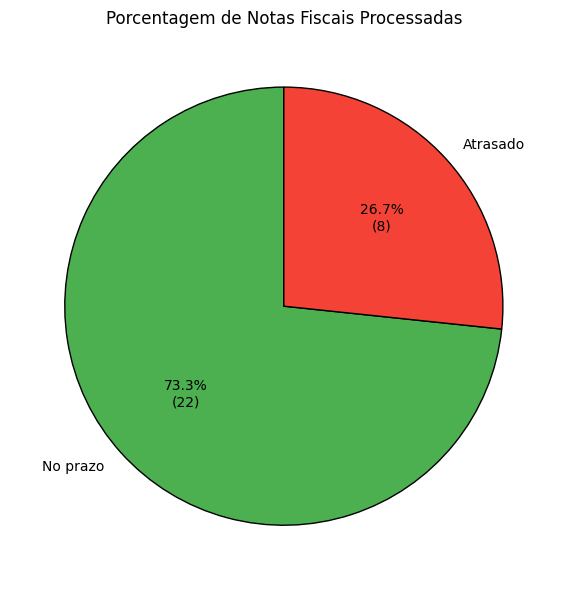

In [38]:
# 1. Porcentagem de notas fiscais atrasadas
# Calcular a quantidade absoluta de notas atrasadas e n√£o atrasadas
atrasadas_count = base_v360['processamento_atrasado'].value_counts()

# Criar o gr√°fico de pizza
fig, ax = plt.subplots(figsize=(6, 6))
atrasadas_count.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(atrasadas_count) / 100)})',  # Formato: porcentagem e quantidade absoluta
    labels=['No prazo', 'Atrasado'],
    colors=['#4caf50', '#f44336'],
    ax=ax,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
ax.set_title('Porcentagem de Notas Fiscais Processadas')
ax.set_ylabel('')  # Remove o r√≥tulo do eixo Y para visualiza√ß√£o limpa

# Exibir o gr√°fico
plt.tight_layout()
plt.show()


OBS: Uma grande parte das notas (22 de 30) est√° sendo processada com atraso, indicando a necessidade de priorizar melhorias no tempo de processamento.

## 2- Avaliar as diverg√™ncias

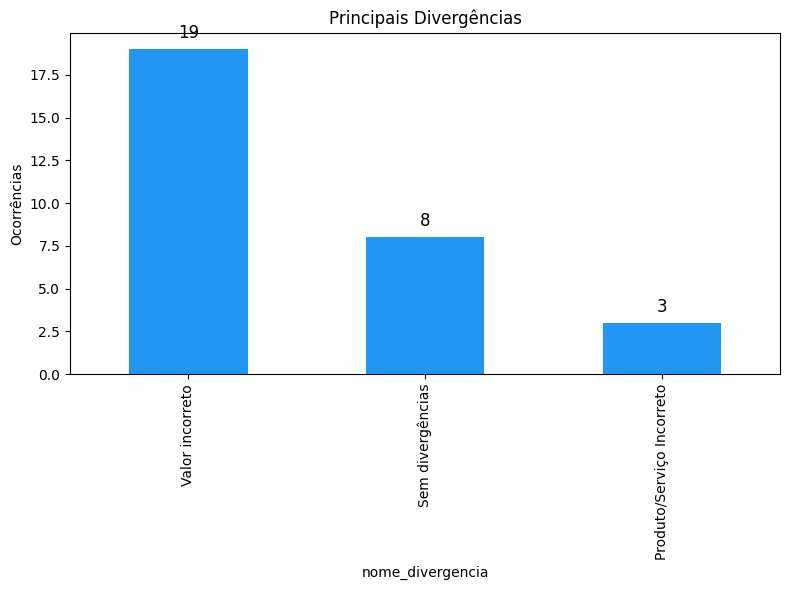

In [39]:
# 2.1 Diverg√™ncias mais frequentes
# Calcular as diverg√™ncias mais frequentes pelo nome
top_divergencias = base_v360['nome_divergencia'].value_counts().head(5)

# Criar o gr√°fico de barras para as diverg√™ncias mais frequentes
plt.figure(figsize=(8, 6))
ax = top_divergencias.plot(
    kind='bar',
    color='#2196f3'
)

# Adicionar as quantidades absolutas dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',  # Ajustado para colocar o texto no topo da barra
                fontsize=12, color='Black',
                xytext=(0, 5), textcoords='offset points')  # Dist√¢ncia entre o topo da barra e o valor

# Adicionar t√≠tulo e r√≥tulos
plt.title('Principais Diverg√™ncias')
plt.ylabel('Ocorr√™ncias')

# Exibir o gr√°fico
plt.tight_layout()
plt.show()
plt.show()


OBS: A causa (nome) de diverg√™ncia mais recorrente √© "Valor incorreto". Isso sugere uma falha comum que pode estar associada ao cadastro ou entrada de dados.Tamb√©m podemos perceber que o n√∫mero total de diverg√™ncias (22) √© o mesmo do n√∫mero de notas atrasadas, o que pode indicar que os atrasos est√£o correlacionados com a exist√™ncia de diverg√™ncias. Vamos verificar isso agora

In [40]:
# 2.1.2 Verifica√ß√£o do tipo e nome de diverg√™ncia
# Filtrar notas atrasadas
notas_atrasadas = base_v360[base_v360['processamento_atrasado'] == 'Sim']

# Contar notas atrasadas com e sem diverg√™ncias
com_divergencia = notas_atrasadas[notas_atrasadas['nome_divergencia'] != 'Sem diverg√™ncias']
sem_divergencia = notas_atrasadas[notas_atrasadas['nome_divergencia'] == 'Sem diverg√™ncias']

# Calcular propor√ß√µes
total_atrasadas = len(notas_atrasadas)
prop_com_div = len(com_divergencia) / total_atrasadas * 100
prop_sem_div = len(sem_divergencia) / total_atrasadas * 100

# Calcular m√©dia de tempo de processamento
media_tempo_com_div = com_divergencia['tempo_processamento'].mean()
media_tempo_sem_div = sem_divergencia['tempo_processamento'].mean()

# Exibir os resultados
print(f"Total de notas atrasadas: {total_atrasadas}")
print(f"Notas atrasadas com diverg√™ncias: {len(com_divergencia)} ({prop_com_div:.2f}%)")
print(f"Notas atrasadas sem diverg√™ncias: {len(sem_divergencia)} ({prop_sem_div:.2f}%)")
print(f"M√©dia de tempo de processamento com diverg√™ncias: {media_tempo_com_div:.2f} dias")
print(f"M√©dia de tempo de processamento sem diverg√™ncias: {media_tempo_sem_div:.2f} dias")

Total de notas atrasadas: 22
Notas atrasadas com diverg√™ncias: 22 (100.00%)
Notas atrasadas sem diverg√™ncias: 0 (0.00%)
M√©dia de tempo de processamento com diverg√™ncias: 5.78 dias
M√©dia de tempo de processamento sem diverg√™ncias: nan dias


OBS: Realmente indentificamos que as notas atrasadas tem diverg√™ncias, enquanto as n√£o atrasadas, n√£o tem. Agora, vamos continuar analisando essas diverg√™ncias para encontrar poss√≠veis gargalos e solucion√°-los afim de obter menos atrasos de processamento

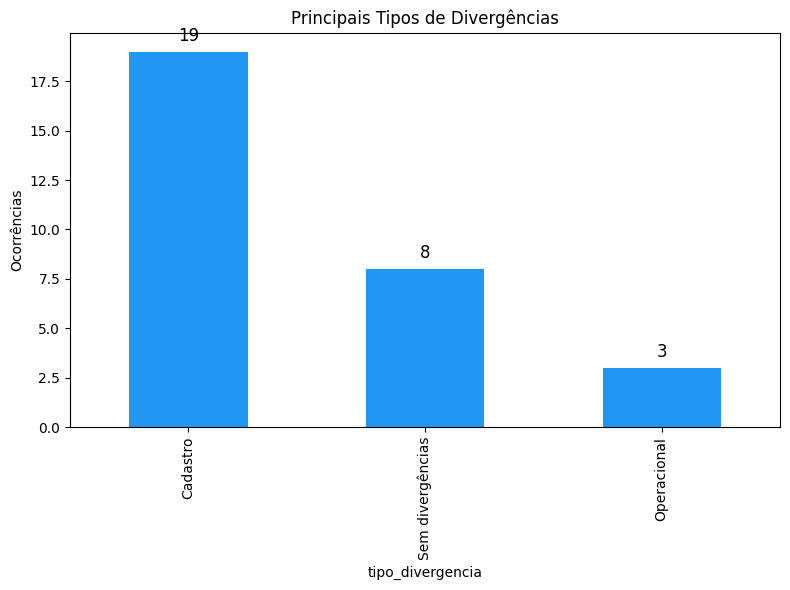

In [41]:
# 2.2 Tipos de diverg√™ncias mais frequentes
# Calcular os tipos de diverg√™ncias mais frequentes
top_divergencias = base_v360['tipo_divergencia'].value_counts().head(5)

# Criar o gr√°fico de barras para as diverg√™ncias mais frequentes
plt.figure(figsize=(8, 6))
ax = top_divergencias.plot(
    kind='bar',
    color='#2196f3'
)

# Adicionar as quantidades absolutas dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',  # Ajustado para colocar o texto no topo da barra
                fontsize=12, color='Black',
                xytext=(0, 5), textcoords='offset points')  # Dist√¢ncia entre o topo da barra e o valor

# Adicionar t√≠tulo e r√≥tulos
plt.title('Principais Tipos de Diverg√™ncias')
plt.ylabel('Ocorr√™ncias')

# Exibir o gr√°fico
plt.tight_layout()
plt.show()
plt.show()

OBS: Percebe-se que o n√∫mero de diverg√™ncias com o tipo 'Cadastro' e 'Operacional' se repetem para as diverg√™ncias de nome 'Valor Incorreto' e 'Produto/Servi√ßo Incorreto'. Isso pode significar que esses nomes e tipos est√£o associados, vamos verificar.

In [42]:
# 2.2.2 Verifica√ß√£o do tipo e nome de diverg√™ncia
# Agrupar por tipo de diverg√™ncia e contar as ocorr√™ncias de cada nome_divergencia
contagem_divergencias_por_tipo = base_v360.groupby('tipo_divergencia')['nome_divergencia'].value_counts()

# Exibir o resultado
contagem_divergencias_por_tipo

tipo_divergencia  nome_divergencia         
Cadastro          Valor incorreto              19
Operacional       Produto/Servi√ßo Incorreto     3
Sem diverg√™ncias  Sem diverg√™ncias              8
Name: count, dtype: int64

OBS: Percebe-se que essas duas colunas est√£o realmente correlacionadas, ou seja, o tipo de diverg√™ncia Cadastro tem como erro o Valor Incorreto e o tipo Operacional tem como erro o Produto/Servi√ßo Incorreto.

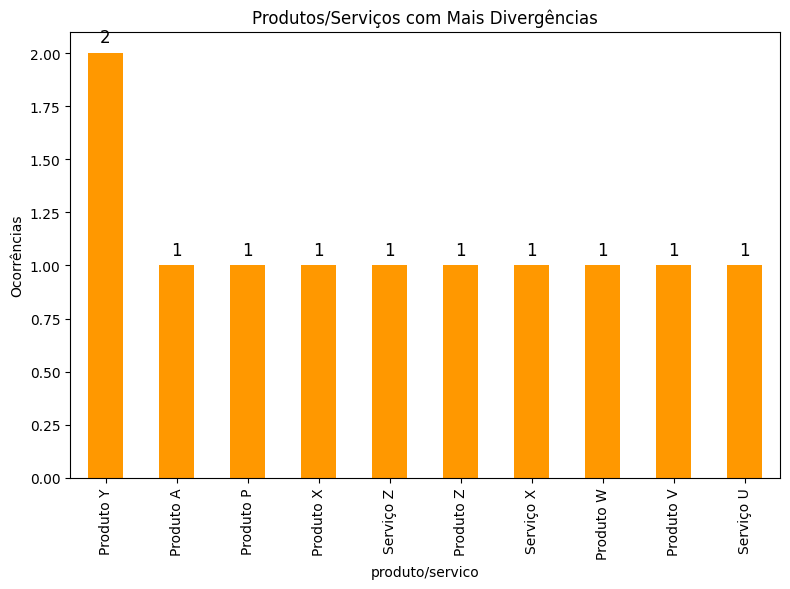

In [43]:
# 2.3 Produtos/servi√ßos com maior n√∫mero de diverg√™ncias
# Calcular os produtos/servi√ßos com maior n√∫mero de diverg√™ncias
top_produtos = base_v360['produto/servico'].value_counts().head(10)

# Criar o gr√°fico de barras para os produtos/servi√ßos com mais diverg√™ncias
plt.figure(figsize=(8, 6))
ax = top_produtos.plot(
    kind='bar',
    color='#ff9800'
)

# Adicionar as quantidades absolutas dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',  # Ajustado para colocar o texto no topo da barra
                fontsize=12, color='Black',
                xytext=(0, 5), textcoords='offset points')  # Dist√¢ncia entre o topo da barra e o valor

# Adicionar t√≠tulo e r√≥tulos
plt.title('Produtos/Servi√ßos com Mais Diverg√™ncias')
plt.ylabel('Ocorr√™ncias')

# Exibir o gr√°fico
plt.tight_layout()
plt.show()

OBS: N√£o existem diferen√ßas claras entre um tipo de produto ou um tipo de servi√ßo mais associados a algum tipo de diverg√™ncia.

## 3- An√°lise por tipo de processo
Sabendo que existem 2 tipos de processos (An√°lise Financeira e An√°lise Operacional) atrelados ao cliente analisado, vamos verificar se existem diferen√ßas entre esses processos que contribuem para o atraso ou n√£o das notas

OBS: H√° diferen√ßas claras entre os tipos de processos. Processos espec√≠ficos podem estar contribuindo significativamente para os atrasos.Vamos verificar em quantidades absolutas por tipo de processo.

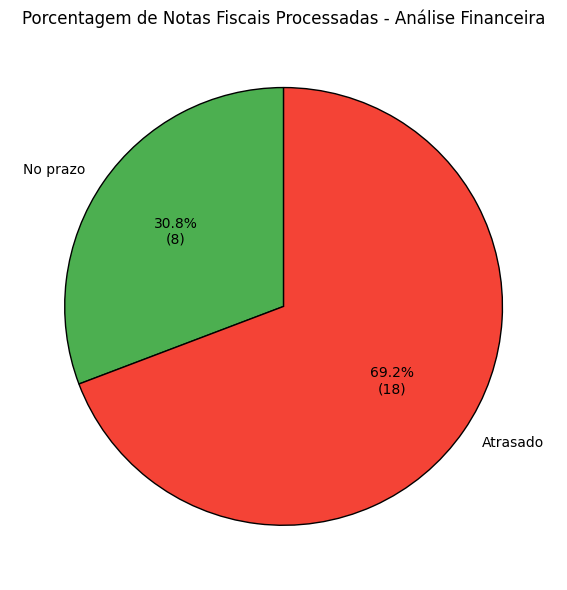

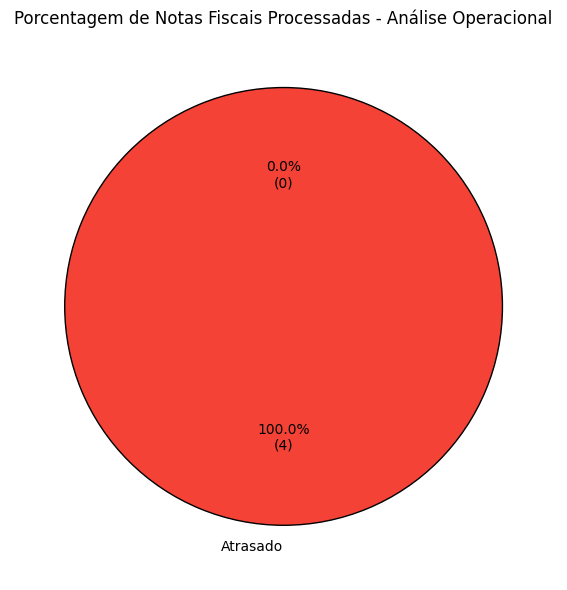

In [44]:
# 3.1 Porcentagem de notas fiscais atrasadas por tipo de processo
# Calcular a quantidade absoluta de notas atrasadas e n√£o atrasadas por tipo de processo
atrasadas_por_tipo = base_v360.groupby('tipo_processo')['processamento_atrasado'].value_counts().unstack(fill_value=0)

# Criar os gr√°ficos de pizza para cada tipo de processo
for tipo, atrasadas_count in atrasadas_por_tipo.iterrows():
    fig, ax = plt.subplots(figsize=(6, 6))

    atrasadas_count.plot(
        kind='pie',
        autopct=lambda p: f'{p:.1f}%\n({int(p * sum(atrasadas_count) / 100)})' if not any(pd.isna(atrasadas_count)) else '',  # Verifica se h√° NaN
        labels=['No prazo', 'Atrasado'],
        colors=['#4caf50', '#f44336'],
        ax=ax,
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )

    ax.set_title(f'Porcentagem de Notas Fiscais Processadas - {tipo}')
    ax.set_ylabel('')  # Remove o r√≥tulo do eixo Y para visualiza√ß√£o limpa

    # Exibir o gr√°fico
    plt.tight_layout()
    plt.show()


OBS: Temos um alto n√∫mero em ambos os tipos, mas An√°lise Operacional se destaca por ter 100% dos casos como atrasados

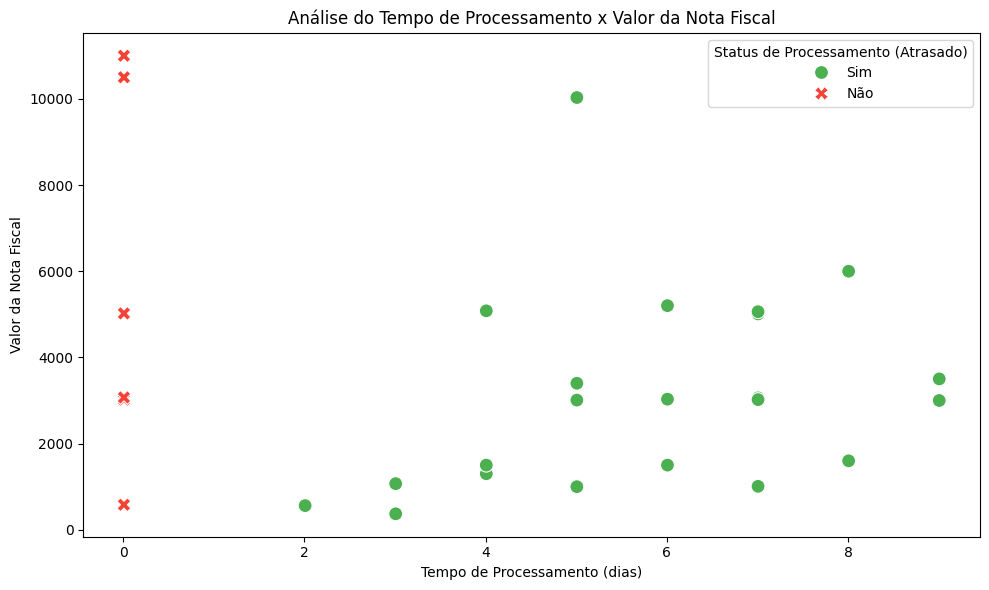

In [45]:
# 3.2 An√°lise do tempo de processamento em rela√ß√£o ao valor do produto/servi√ßo
# Criar gr√°fico de dispers√£o
plt.figure(figsize=(10, 6))

# Aplicar cores personalizadas com base na coluna 'atrasado'
sns.scatterplot(
    data=base_v360,
    x='tempo_processamento',  # Eixo X agora √© o tempo de processamento
    y='valor',  # Eixo Y √© o valor da nota fiscal (ajuste conforme necess√°rio)
    hue='processamento_atrasado',  # Distin√ß√£o entre atrasado ou n√£o
    palette={'N√£o': '#f44336', 'Sim': '#4caf50'},  # Atrasado - Vermelho, No prazo - Verde
    style='processamento_atrasado',  # Diferencia os pontos com marcador
    markers=['o', 'X'],  # Definindo os tipos de marcadores
    s=100,  # Tamanho dos pontos
)

# Adicionar t√≠tulo e r√≥tulos
plt.title('An√°lise do Tempo de Processamento x Valor da Nota Fiscal')
plt.xlabel('Tempo de Processamento (dias)')
plt.ylabel('Valor da Nota Fiscal')

# Exibir a legenda e o gr√°fico
plt.legend(title='Status de Processamento (Atrasado)')
plt.tight_layout()

OBS: Percebe-se que o tempo de processamento tende a aumentar com base em maiores valores no processo.

## Propostas sugeridas

### üìå Recomenda√ß√µes para Otimiza√ß√£o do Processo de Notas Fiscais ‚Äì Case V360

Com base na an√°lise dos dados da base **V360**, identificamos **tr√™s principais desafios** enfrentados pelo cliente:  

1Ô∏è‚É£ **Atraso no processamento das notas fiscais** (prazo aceit√°vel: 2 dias, mas a maioria excede esse limite).  
2Ô∏è‚É£ **Diverg√™ncias recorrentes durante o processamento**, sem clareza sobre as causas.  
3Ô∏è‚É£ **Dificuldade na visualiza√ß√£o e monitoramento das notas fiscais capturadas diariamente**.  

A seguir, apresentamos recomenda√ß√µes estrat√©gicas para solucionar esses problemas.  

### üìç 1. Reduzir o Tempo de Processamento das Notas Fiscais

üî∏ **Automa√ß√£o de processos**: Implementar um sistema de prioriza√ß√£o autom√°tica para notas fiscais pr√≥ximas ao prazo limite.  
üî∏ **Monitoramento cont√≠nuo**: Criar um **indicador de tempo m√©dio de processamento** por tipo de processo, permitindo ajustes r√°pidos.  
üî∏ **Revis√£o dos processos de An√°lise Operacional**: Esse tipo de processo est√° **100% associado a atrasos** e deve ser otimizado com urg√™ncia.  
üî∏ **Ajustes na aloca√ß√£o de recursos**: Redirecionar equipes para os processos com maior impacto no tempo de processamento.  

### üìç 2. Identificar e Corrigir as Principais Diverg√™ncias

üîπ **Diverg√™ncia mais recorrente:** **"Valor incorreto"**, geralmente associada a problemas de **cadastro**.  
üîπ **Correla√ß√£o entre diverg√™ncias e atrasos:** Notas atrasadas **sempre** apresentam diverg√™ncias.  
üîπ **Diverg√™ncias por tipo:**  
   - **Erro de Cadastro** ‚Üí Fortemente associado ao erro **"Valor incorreto"**.  
   - **Erro Operacional** ‚Üí Fortemente associado ao erro **"Produto/Servi√ßo Incorreto"**.  

üìå **A√ß√µes recomendadas:**  
‚úÖ **Implementar valida√ß√£o autom√°tica de dados** no cadastro para evitar erros que levem a diverg√™ncias.  
‚úÖ **Criar alertas para diverg√™ncias cr√≠ticas**, permitindo corre√ß√£o r√°pida antes do processamento.  
‚úÖ **Padronizar as regras de entrada de dados** para minimizar erros manuais.  

### üìç 3. Melhorar a Visualiza√ß√£o e o Monitoramento das Notas

üìä **Solu√ß√£o: Constru√ß√£o de um Dashboard Gerencial**

- **üìå Principais m√©tricas a serem monitoradas:**  
  üîπ **Tempo m√©dio de processamento** por tipo de processo.  
  üîπ **Distribui√ß√£o de diverg√™ncias** (tipo e nome).  
  üîπ **Correla√ß√£o entre valores da nota e tempo de processamento.**    

üéØ **Benef√≠cios esperados:**  
‚úî Melhor rastreabilidade das notas fiscais.  
‚úî Identifica√ß√£o √°gil de gargalos no processo.  
‚úî Redu√ß√£o de diverg√™ncias por meio de ajustes direcionados.  
‚úî Otimiza√ß√£o da tomada de decis√£o com base em dados reais.  

### üöÄ Conclus√£o

A an√°lise revelou que os **atrasos no processamento** est√£o altamente correlacionados com a **presen√ßa de diverg√™ncias**, especialmente erros de **valor e cadastro**. Al√©m disso, a **An√°lise Operacional** se mostrou o maior gargalo no tempo de processamento.  

A implementa√ß√£o das **recomenda√ß√µes acima** garantir√° uma **redu√ß√£o dos atrasos**, uma **melhor visibilidade operacional** e um **controle mais eficaz das diverg√™ncias**.  

üîπ **Pr√≥ximos passos:**  
üìå Criar e implementar o **dashboard de acompanhamento**.  
üìå Revisar e **automatizar processos cr√≠ticos** para reduzir tempo de processamento.  
üìå **Corrigir falhas no cadastro e na entrada de dados** para diminuir diverg√™ncias.  

Com essas a√ß√µes, o cliente poder√° alcan√ßar maior efici√™ncia e confiabilidade em seu processo de notas fiscais. üìà‚ú®


## Extra

## Modelo Machine Learning de Segmenta√ß√£o

Escolhi o K-Means para esse caso porque ele √© a melhor op√ß√£o para segmentar os dados do cliente e identificar notas fiscais com maior chance de apresentar diverg√™ncias. O K-Means agrupa automaticamente as notas fiscais em clusters com caracter√≠sticas semelhantes, o que facilita a detec√ß√£o de padr√µes, como erros de produto, valor incorreto ou problemas de cadastro. Isso nos permite focar nos grupos de notas com maior risco de falhas, otimizando o uso dos recursos. Al√©m disso, o K-Means √© simples, eficiente e funciona bem com grandes volumes de dados, tornando a an√°lise mais √°gil e eficaz.

In [46]:
# Criar uma c√≥pia do conjunto de dados com as principais colunas para an√°lise
df_selecionado = base_v360[
    [
        "tipo_processo",
        "nome_divergencia",
        "tipo_divergencia",
        "tempo_processamento",
        "processamento_atrasado",
    ]
].copy()

# Aplicar codifica√ß√£o one-hot nas vari√°veis categ√≥ricas
df_codificado = pd.get_dummies(
    df_selecionado,
    columns=["tipo_processo", "nome_divergencia", "tipo_divergencia"],
    drop_first=True
)

# Substituir 'N√£o' por 0 e 'Sim' por 1
df_codificado = df_codificado.replace({'N√£o': 0, 'Sim': 1})

# Verificar a estrutura do dataframe resultante
df_codificado.head()


<ipython-input-46-28998dcc7106>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_codificado = df_codificado.replace({'N√£o': 0, 'Sim': 1})


tempo_processamento  processamento_atrasado  \
0             5.006944                       1   
1             6.006944                       1   
2             4.006944                       1   
3             8.006944                       1   
4             9.006944                       1   

   tipo_processo_An√°lise Operacional  nome_divergencia_Sem diverg√™ncias  \
0                              False                              False   
1                              False                              False   
2                              False                              False   
3                              False                              False   
4                              False                              False   

   nome_divergencia_Valor incorreto  tipo_divergencia_Operacional  \
0                              True                         False   
1                              True                         False   
2                              True                         False   
3                              True                         False   
4                              True                         False   

   tipo_divergencia_Sem diverg√™ncias  
0                              False  
1                              False  
2                              False  
3                              False  
4                              False

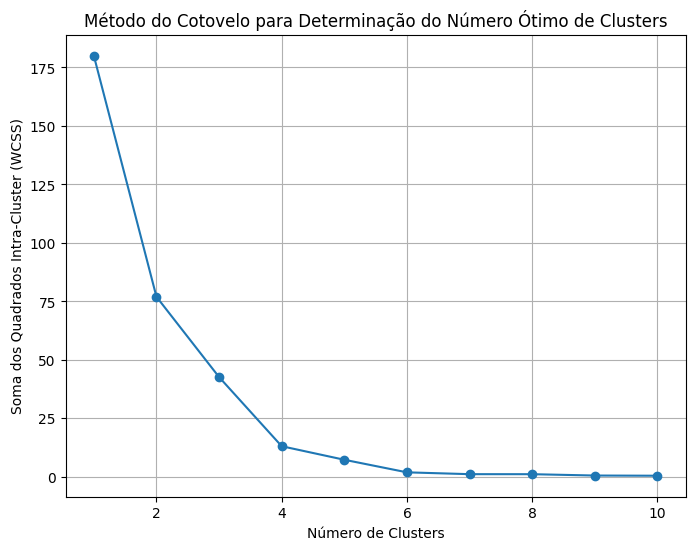

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Padronizar as colunas num√©ricas para garantir pesos iguais na clusteriza√ß√£o
escalador = StandardScaler()
df_clusterizacao_escalado = escalador.fit_transform(
    df_codificado.drop(columns=["processamento_atrasado"])
)

# Determinar o n√∫mero √≥timo de clusters usando o m√©todo do cotovelo
wcss = []  # Soma dos quadrados intra-cluster (Within-Cluster Sum of Squares)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_clusterizacao_escalado)
    wcss.append(kmeans.inertia_)

# Plotar o gr√°fico do m√©todo do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("M√©todo do Cotovelo para Determina√ß√£o do N√∫mero √ìtimo de Clusters")
plt.xlabel("N√∫mero de Clusters")
plt.ylabel("Soma dos Quadrados Intra-Cluster (WCSS)")
plt.grid()
plt.show()


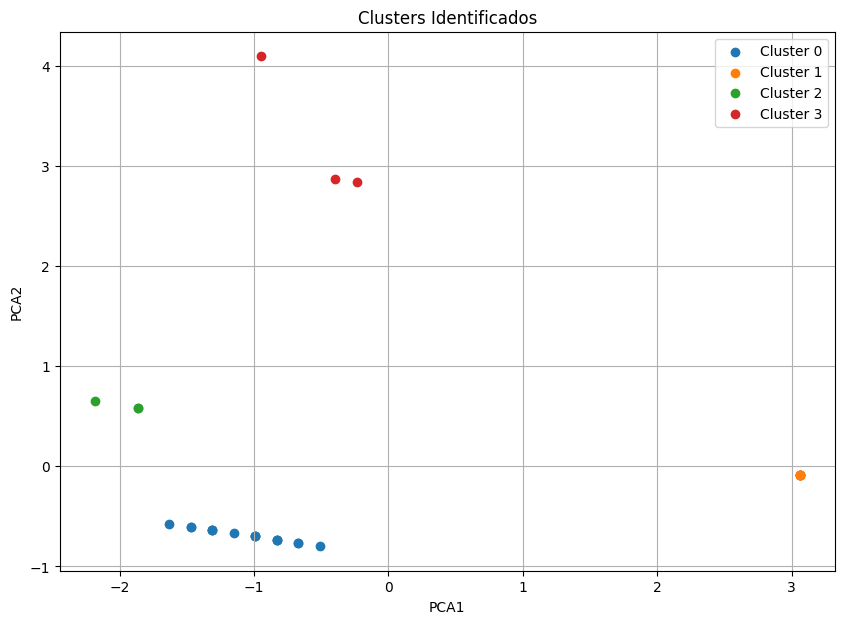

tempo_processamento  processamento_atrasado  \
Cluster                                                
0                   5.444444                     1.0   
1                   0.006944                     0.0   
2                   7.673611                     1.0   
3                   5.673611                     1.0   

         tipo_processo_An√°lise Operacional  nome_divergencia_Sem diverg√™ncias  \
Cluster                                                                         
0                                 0.000000                                0.0   
1                                 0.000000                                1.0   
2                                 1.000000                                0.0   
3                                 0.333333                                0.0   

         nome_divergencia_Valor incorreto  tipo_divergencia_Operacional  \
Cluster                                                                   
0                                     1.0                           0.0   
1                                     0.0                           0.0   
2                                     1.0                           0.0   
3                                     0.0                           1.0   

         tipo_divergencia_Sem diverg√™ncias  
Cluster                                     
0                                      0.0  
1                                      1.0  
2                                      0.0  
3                                      0.0

In [48]:
from sklearn.decomposition import PCA

# Definir o n√∫mero ideal de clusters (substituir pelo valor determinado na an√°lise)
k_otimizado = 4  # Substituir pelo n√∫mero ideal de clusters

# Aplicar K-Means com o n√∫mero ideal de clusters
kmeans = KMeans(n_clusters=k_otimizado, random_state=42)
clusters = kmeans.fit_predict(df_clusterizacao_escalado)

# Adicionar os r√≥tulos dos clusters ao DataFrame original
df_codificado["Cluster"] = clusters

# Reduzir a dimensionalidade para 2D usando PCA para visualiza√ß√£o
pca = PCA(n_components=2)
resultado_pca = pca.fit_transform(df_clusterizacao_escalado)

# Criar um DataFrame com os resultados do PCA e os clusters
df_pca = pd.DataFrame(resultado_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = clusters

# Plotar os clusters no espa√ßo 2D
plt.figure(figsize=(10, 7))
for cluster in range(k_otimizado):
    dados_cluster = df_pca[df_pca["Cluster"] == cluster]
    plt.scatter(dados_cluster["PCA1"], dados_cluster["PCA2"], label=f"Cluster {cluster}")

plt.title("Clusters Identificados")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.grid()
plt.show()

# Exibir as caracter√≠sticas m√©dias de cada cluster
resumo_clusters = df_codificado.groupby("Cluster").mean()
resumo_clusters


### Defini√ß√£o de Clusters
- **Cluster 0**: Apresenta problemas de valor incorreto, diverg√™ncia de cadastro, e diverg√™ncia de produto/servi√ßo incorreto. O tempo de processamento √© relativamente alto.

- **Cluster 1**: O cluster com o melhor desempenho, sem atrasos, diverg√™ncias de cadastro ou produto/servi√ßo incorreto, e com tempo de processamento muito baixo.

- **Cluster 2**: Apresenta problemas semelhantes ao Cluster 0, mas com um tempo de processamento mais alto e com diverg√™ncia operacional. A an√°lise operacional tamb√©m est√° presente.

- **Cluster 3**: Apresenta problemas de diverg√™ncia operacional, produto/servi√ßo incorreto, e valor incorreto, mas sem diverg√™ncia de cadastro. O tempo de processamento tamb√©m √© elevado.

### An√°lise de Clusters üìä

## **Cluster 0**  
- **‚è≥ Tempo de processamento:** **Alto** (5.44)  
- **‚ö†Ô∏è Processamento atrasado:** **Frequente** (1.0)  
- **üîç Tipo de processo:** **N√£o relacionado √† An√°lise Operacional**  
- **‚ùå Diverg√™ncias:** **Apenas de valor**  

### üìå A√ß√µes recomendadas:  
‚úÖ **Reduzir o tempo de processamento** com otimiza√ß√£o dos fluxos de trabalho.  
‚úÖ **Corrigir diverg√™ncias de valor** implementando valida√ß√µes autom√°ticas.  
‚úÖ **Aprimorar o treinamento** para minimizar erros nos registros financeiros.  
‚úÖ **Gerenciar atrasos** identificando gargalos e ajustando prazos operacionais.  

---

## **Cluster 1**  
- **‚è≥ Tempo de processamento:** **Quase zero** (0.0069)  
- **‚úÖ Processamento atrasado:** **N√£o ocorre** (0.0)  
- **üîç Tipo de processo:** **N√£o relacionado √† An√°lise Operacional**  
- **‚úÖ Diverg√™ncias:** **Nenhuma**  

### üìå A√ß√µes recomendadas:  
‚úÖ **Manter as boas pr√°ticas atuais** e garantir que os processos continuem eficientes.  
‚úÖ **Escalar as estrat√©gias bem-sucedidas** para outras opera√ß√µes.  
‚úÖ **Monitorar continuamente o desempenho** para garantir que a efici√™ncia seja mantida.  

---

## **Cluster 2**  
- **‚è≥ Tempo de processamento:** **Muito alto** (7.67)  
- **‚ö†Ô∏è Processamento atrasado:** **Frequente** (1.0)  
- **üîç Tipo de processo:** **An√°lise Operacional**  
- **‚ùå Diverg√™ncias:** **Apenas de valor**  

### üìå A√ß√µes recomendadas:  
‚úÖ **Melhorar a efici√™ncia operacional** para reduzir o tempo de processamento.  
‚úÖ **Corrigir diverg√™ncias de valor** por meio de sistemas de valida√ß√£o em tempo real.  
‚úÖ **Aprimorar o treinamento da equipe** para garantir a correta precifica√ß√£o e registro de valores.  
‚úÖ **Reduzir atrasos** analisando as causas e ajustando prazos e processos.  

---

## **Cluster 3**  
- **‚è≥ Tempo de processamento:** **Alto** (5.67)  
- **‚ö†Ô∏è Processamento atrasado:** **Frequente** (1.0)  
- **üîç Tipo de processo:** **Parcialmente relacionado √† An√°lise Operacional** (33%)  
- **‚ùå Diverg√™ncias:** **Operacionais, sem problemas de valor**  

### üìå A√ß√µes recomendadas:  
‚úÖ **Corrigir falhas operacionais** que impactam o tempo de execu√ß√£o.  
‚úÖ **Ajustar processos operacionais** com valida√ß√µes mais rigorosas para evitar erros.  
‚úÖ **Reduzir atrasos** alocando melhor os recursos e redefinindo prazos.  
‚úÖ **Investir em ferramentas tecnol√≥gicas** para controle e monitoramento cont√≠nuo.  
